In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
%matplotlib inline

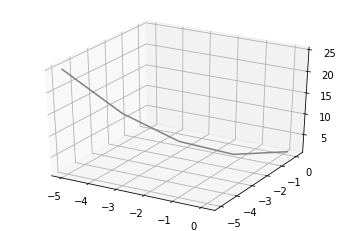

In [2]:
# Data for a three-dimensional line
ax = plt.axes(projection='3d')
x = np.linspace(-5, 0.1, 5)
y = np.linspace(-5, 0.1, 5)
zline = x**2+ math.e**x + y**2 - x*y
ax.plot3D(x,y, zline, 'gray')

In [3]:
def calcd(x1,y1,x2,y2):  
    d = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
    return d

In [4]:
def get_line_intersection(k1,n1,k2,n2):
    # l1: y = k1*x +n1
    # l2: y = k2*x + n2
    # k1*x  + n1 = k2*x + n2
    x = (n2 - n1)/(k1-k2)
    y = k1*x + n2
    return x,y

In [5]:
def get_line_coef(x1,y1,x2,y2):
    if( x2 == x1):
        return [0,0]
    k = (y2 -y1) / (x2-x1)
    n = (y1 - k*x1)
    return np.array([k,n])

In [6]:
def get_normal_k(k):
    if(k == 0):
        return 0 
    return -(1/k)

In [7]:
def circle_proj(x,y):
    #If already in circle
    if((x**2 + y**2) <=1.5):
        return np.array([x,y])
    #calculate slope for a line from our point to center of circle
    k = y/x
    #get coordinates of intersection of line and circle ( project to the defined convex set)
    x1 = math.sqrt((1.5/(1+k**2)))
    x2 = -x1
    y1 = k*x1
    y2 = k*x2
    
    dis1 = calcd(x,y,x1,y1)
    dis2 =calcd(x,y,x2,y2)
    
    if(dis1 < dis2):
        return np.array([x1,y1])
    return np.array([x2,y2])

In [8]:
def get_t(x,y,x1,y1,x2,y2):
    if(x1 == x2 and y2 == y1):
        return False
    t = -(((x1 - x)*(x2 - x1) + (y1 - y)*(y2 - y1))/((x2 - x1)**2 + (y2 - y1)**2))
    return t

In [9]:
def get_ls_proj(x,y,x1,y1,x2,y2):
    #line segment
    lsk,lsn = get_line_coef(x1,y1,x2,y2)
    # point line construction:
    if(lsk != 0):
        plk = get_normal_k(lsk)
        pln = y - plk*x
        return get_line_intersection(plk,pln,lsk,lsn)
    # vertical lines
    elif(lsn == 0):
        return x1,y
    else:
        return x,y1
   

In [10]:
def lines_proj(x,y,lines):
    res =  []
    for l in lines:
        x1,y1,x2,y2 = l
        t = get_t(x,y,x1,y1,x2,y2)
        if(t>=0 and t<=1):
            rx, ry = get_ls_proj(x,y,x1,y1,x2,y2)
            d = calcd(x,y,rx,ry)
        elif(t<0):
            rx, ry = x1,y1
            d = calcd (x,y,x1,y1)
        else:
            rx,ry = x2,y2
            d = calcd(x,y,x2,y2)
        res.append([rx,ry,d])
    arr = np.array(res)
    row_i = np.argmin(arr[:,-1])

    return arr[row_i,:-1]

In [11]:
def square_proj(x,y):
    if(x>=-1 and x<=1 and y>=-1 and y<=1):
        return np.array([x,y])
    lines = []
    # top_line y = 1
    lines.append([-1,1,1,1])
    # bottom_line y = -1
    lines.append([-1,-1,1,-1])
    # left_line x = -1
    lines.append([-1,-1,-1,1])
    # right_line x = 1
    lines.append([1,-1,1,1])
    return lines_proj(x,y,lines)


In [12]:
#  (−1, −1),(1.5, −1),(−1, 1.5).
def triangle_proj(x,y):
    if( y <=(-x + 0.5) and x>=-1 and y>=-1):
        return np.array([x,y])
    lines = []
    # bottom_line y = -1
    lines.append([-1,-1,1.5,-1])
    # right_line y= -x + 0.5
    lines.append([-1,1.5,1.5,-1])
    # left_line x = -1
    lines.append([-1,-1,-1,1.5])
    return lines_proj(x,y,lines)

In [13]:
def gradient_descent(point, lr, gradient, steps = 1, prj = lambda x,y: np.array([x,y])):
    # starting point - point
    # lr - learning rate
    # gradient -  gradient function
    # steps -  how many times to perform the algorithm
    # prj - projection for PGD
    results = []
    for step in range(steps):
        new_point = point - lr*gradient(*point)
        results.append(prj(*new_point))
        point = new_point
    return np.array(results)

In [14]:
def grad2(x,y):
    return np.array([2*x + math.e**x - y,2*y-x])
def grad3(x,y):
    return np.array([2*x,4*y])

In [15]:
x1 = np.array([-1,1])
x_min = np.array([-0.4,-0.2])
beta = 9.599
L = 6
alpha = 9.383
T = 10
lr1 = 1/beta
lr2 = calcd(*x1,*x_min)/(L*math.sqrt(10))
lr3 = 2/(alpha + beta)

In [16]:
domains = [circle_proj,square_proj,triangle_proj]
_1,_2,_3 = [],[],[]
for i,domain in enumerate(domains):
    print(i+1,'. Domain:')
    print('Results for first learning rate:')
    res = gradient_descent(x1,lr=lr1,gradient=grad2,steps=T,prj=domain)
    print(res)
    _1.append(res[-1])
    print('Results for second learning rate:')
    res = gradient_descent(x1,lr=lr2,gradient=grad2,steps=T,prj=domain)
    print(res)
    _2.append(res[-1])
    print('Results for third learning rate:')
    res = gradient_descent(x1,lr=lr3,gradient=grad2,steps=T,prj=domain)
    print(res)
    _3.append(res[-1])

1 . Domain:
Results for first learning rate:
[[-0.72579221  0.68746744]
 [-0.55336687  0.46861891]
 [-0.44915372  0.31333141]
 [-0.38941095  0.20125551]
 [-0.35788458  0.11875505]
 [-0.34378202  0.05672831]
 [-0.34011405  0.00909432]
 [-0.34244416 -0.02823276]
 [-0.34800487 -0.05802531]
 [-0.3551005  -0.08218973]]
Results for second learning rate:
[[-0.81388097  0.78786797]
 [-0.67440451  0.61889653]
 [-0.57129096  0.48368375]
 [-0.49623371  0.37488416]
 [-0.44259738  0.28677851]
 [-0.40514847  0.21492555]
 [-0.37980968  0.15588216]
 [-0.36343945  0.1069805 ]
 [-0.35364047  0.06615212]
 [-0.34859839  0.03179064]]
Results for third learning rate:
[[-0.72267195  0.68391107]
 [-0.54947612  0.4636504 ]
 [-0.44565666  0.30805279]
 [-0.38676271  0.19618236]
 [-0.35615945  0.11409117]
 [-0.34287854  0.05252318]
 [-0.33986981  0.00532848]
 [-0.342693   -0.03160406]
 [-0.34860114 -0.06105142]
 [-0.35592636 -0.08491595]]
2 . Domain:
Results for first learning rate:
[[-0.72579221  0.68746744]
 [-

In [17]:
print(np.array(_1))
print(np.array(_2))
print(np.array(_3))

[[-0.3551005  -0.08218973]
 [-0.3551005  -0.08218973]
 [-0.3551005  -0.08218973]]
[[-0.34859839  0.03179064]
 [-0.34859839  0.03179064]
 [-0.34859839  0.03179064]]
[[-0.35592636 -0.08491595]
 [-0.35592636 -0.08491595]
 [-0.35592636 -0.08491595]]


##### Note:
We can see that best performing learning rate at the is the one which got closest to the actual minimum. In this case the learning rate 3 (**lr3**) showed the best results. We can say that this was logical outcome because strong convexity and beta smoothness was use for optimization of function in terms of convexity.